In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mpl_dates

In [2]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)
# Obtaining historical stock pricing data
ticker_symbol = 'AAPL'
ticker = yf.Ticker(ticker_symbol)

start_date = '2020-01-01'
end_date = '2023-06-24'

df = ticker.history(interval='1d', start=start_date, end=end_date)

df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2020-01-02,72.344231,73.408983,72.087816,73.347931,135480400,0.0,0.0,18263.0
2020-01-03,72.566479,73.404112,72.407745,72.634857,146322800,0.0,0.0,18264.0
2020-01-06,71.745937,73.252697,71.491958,73.213623,118387200,0.0,0.0,18267.0
2020-01-07,73.223391,73.482251,72.647063,72.869293,108872000,0.0,0.0,18268.0
2020-01-08,72.568913,74.346749,72.568913,74.041489,132079200,0.0,0.0,18269.0
...,...,...,...,...,...,...,...,...
2023-06-16,186.729996,186.990005,184.270004,184.919998,101235600,0.0,0.0,19524.0
2023-06-20,184.410004,186.100006,184.410004,185.009995,49799100,0.0,0.0,19528.0
2023-06-21,184.899994,185.410004,182.589996,183.960007,49515700,0.0,0.0,19529.0


In [3]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
count,875.000000,875.000000,875.000000,875.000000,8.750000e+02,875.000000,875.000000,875.000000
mean,132.933930,134.591835,131.393608,133.071344,1.054551e+08,0.003489,0.004571,18896.397714
std,30.932977,31.146687,30.724587,30.955630,5.511609e+07,0.027424,0.135225,366.317158
min,55.831195,55.934006,52.044328,54.923031,3.519590e+07,0.000000,0.000000,18263.000000
25%,118.203864,119.691701,116.840759,118.448399,7.067560e+07,0.000000,0.000000,18577.500000
50%,140.480890,142.391366,137.952173,140.530762,8.994600e+07,0.000000,0.000000,18897.000000
75%,154.047652,156.379436,152.461957,154.515221,1.216544e+08,0.000000,0.000000,19213.500000
max,186.729996,187.559998,185.009995,187.000000,4.265100e+08,0.240000,4.000000,19531.000000


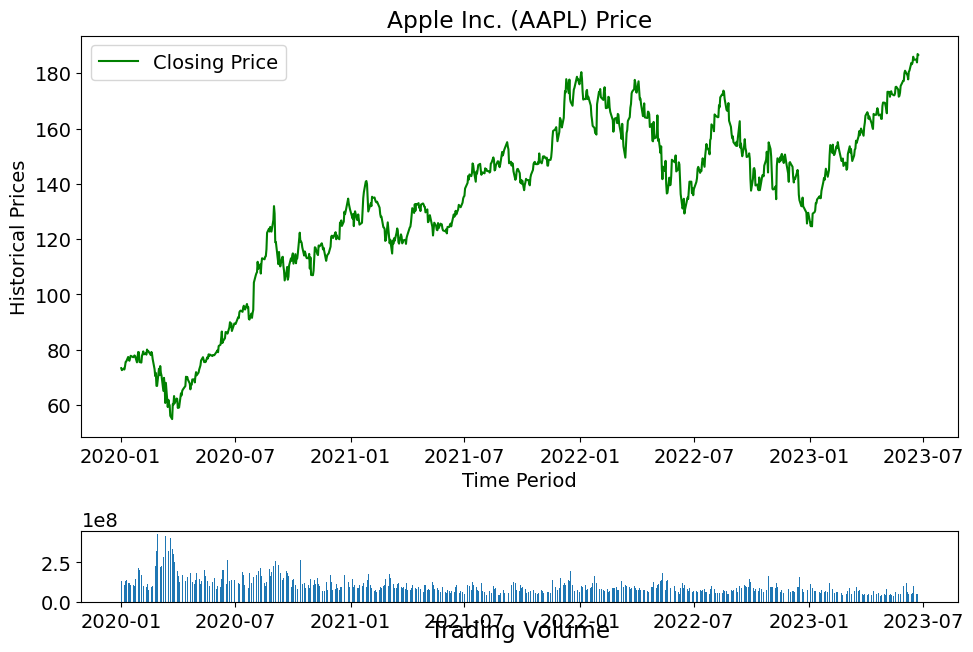

In [4]:
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(df['Close'].loc['2020-01-01':].index, df['Close'].loc['2020-01-01':], color = 'g', label='Closing Price')
plt.xlabel('Time Period')
plt.ylabel('Historical Prices')
plt.title('Apple Inc. (AAPL) Price')
plt.legend()
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(df['Volume'].loc['2020-01-01':].index, df['Volume'].loc['2020-01-01':])
plt.title('\nTrading Volume', y=-0.60)
plt.gcf().set_size_inches(10,8)
plt.tight_layout()

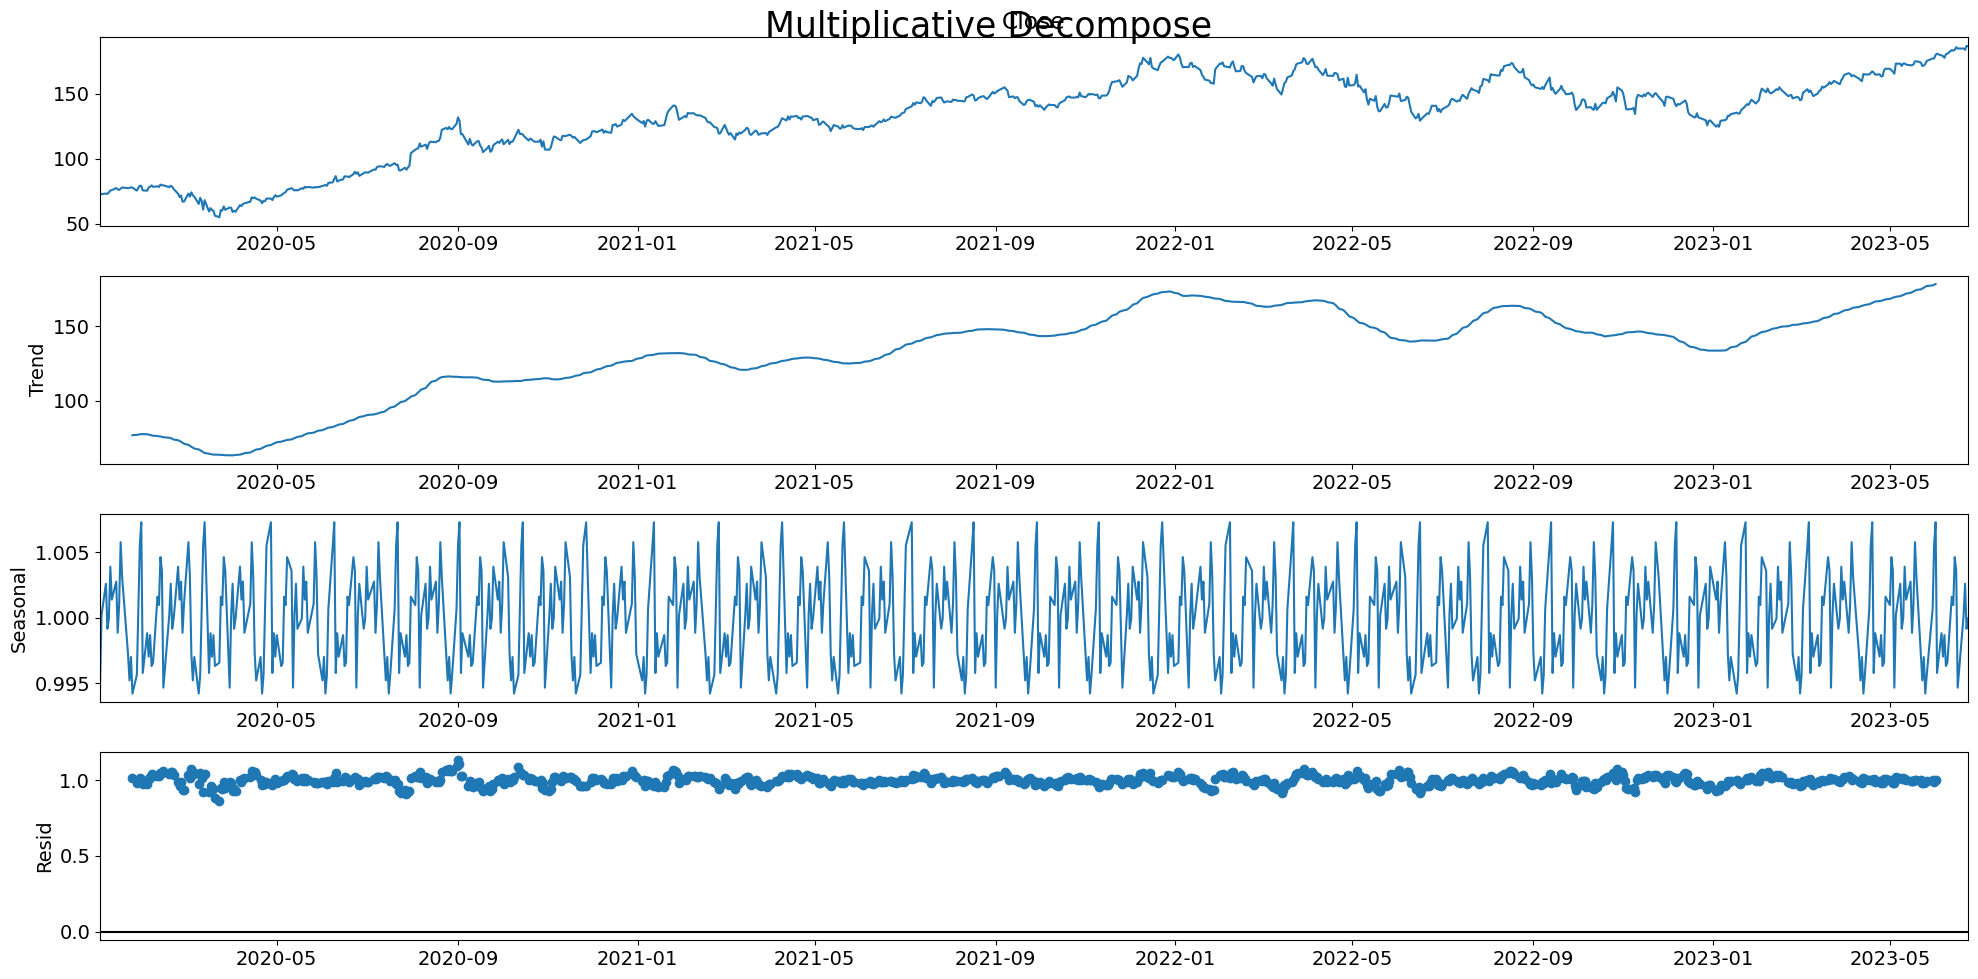

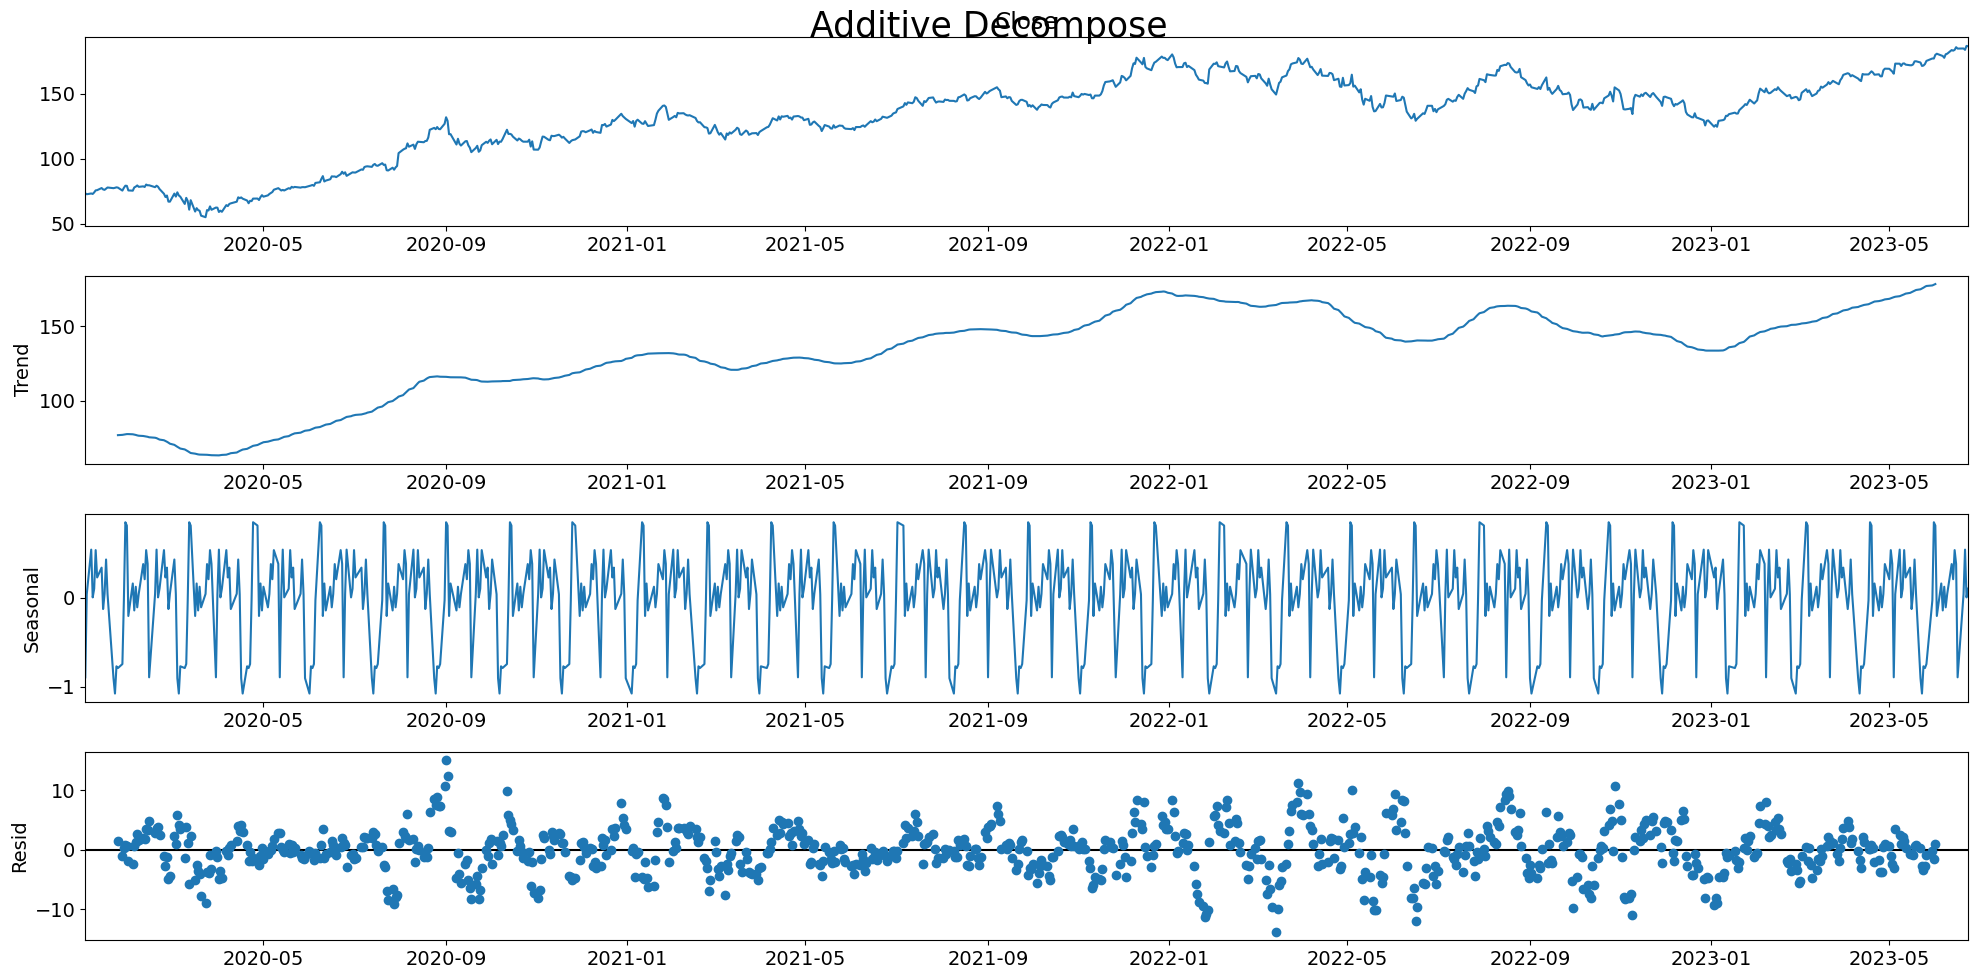

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(df, column_name):
    """
    A function that returns the trend, seasonality and residual captured by applying both multiplicative and
    additive model.
    df -> DataFrame
    column_name -> column_name for which trend, seasonality is to be captured
    """
    result_mul = seasonal_decompose(df[column_name], model='multiplicative', period=30)
    result_add = seasonal_decompose(df[column_name], model = 'additive', period=30)

    plt.rcParams.update({'figure.figsize': (20, 10)})
    result_mul.plot().suptitle('Multiplicative Decompose', fontsize=25)
    result_add.plot().suptitle('Additive Decompose', fontsize=25)
    plt.show()
    
    return result_mul, result_add
result_mul, result_add = decompose(df, 'Close')

C:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


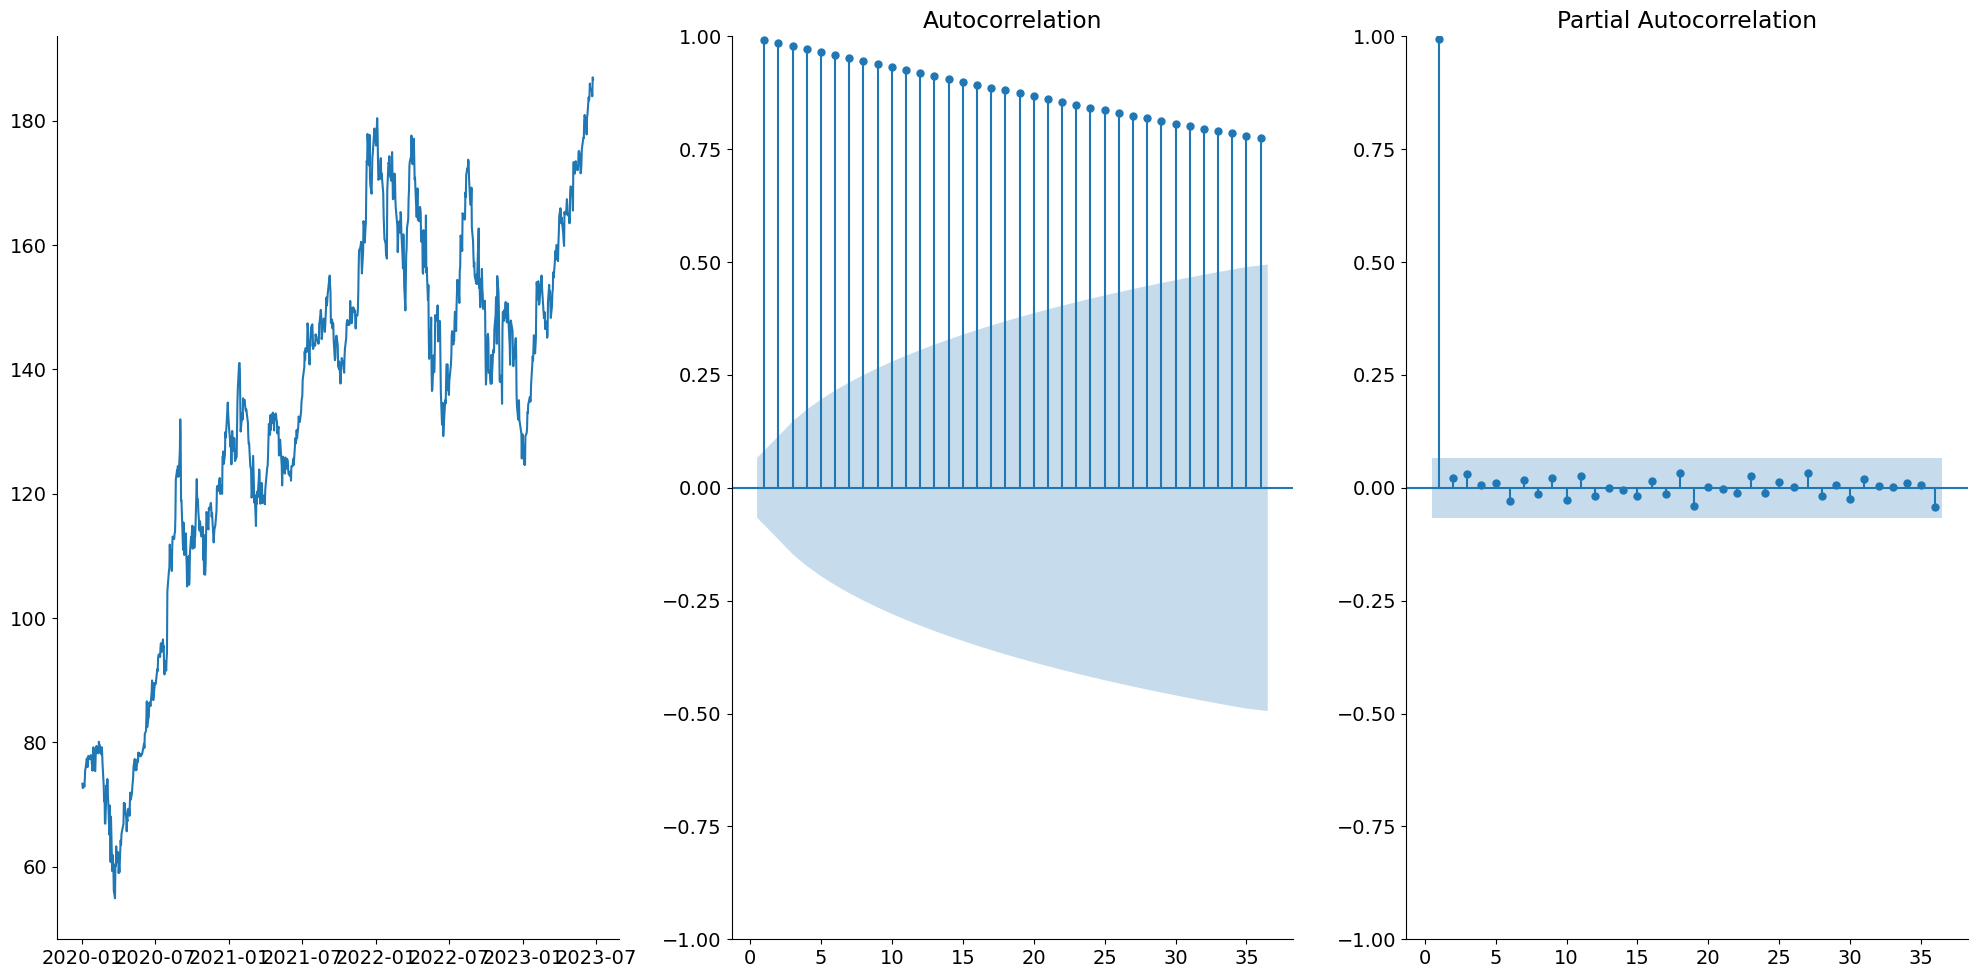

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    raw.plot(data)
    plot_acf(data, lags=lags, ax=acf, zero=False)
    plot_pacf(data, lags=lags, ax=pacf, zero = False)
    sns.despine()
    plt.tight_layout()
    
plots(df['Close'], lags=36);

In [7]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Close'].dropna())
print('p-value: ', result[1])

p-value:  0.5901745825358027


In [8]:
train = df['Close'][:'2023-05-31']
train.tail()

Date
2023-05-24    171.839996
2023-05-25    172.990005
2023-05-26    175.429993
2023-05-30    177.300003
2023-05-31    177.250000
Name: Close, dtype: float64

In [9]:
print('The number of train observations is', len(train))

The number of train observations is 859


In [10]:
test = df['Close']['2023-06-01':]
print('The number of train observations is', len(test))

The number of train observations is 16


In [27]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error,mean_squared_error
triple = ExponentialSmoothing(train,
                              trend="add",
                              seasonal="add",
                              seasonal_periods=7).fit(optimized=True)
triple_preds = triple.forecast(len(test))
print("Predictions: ", triple_preds)
print(f'MSE of Addictive Holt Winters Model = {mean_squared_error(test,triple_preds)}')

Predictions:  859    177.375668
860    177.253468
861    178.017146
862    178.235929
863    178.095012
864    178.086897
865    178.097055
866    178.226354
867    178.104155
868    178.867832
869    179.086615
870    178.945699
871    178.937583
872    178.947741
873    179.077040
874    178.954841
dtype: float64
MSE of Addictive Holt Winters Model = 24.426136046367887


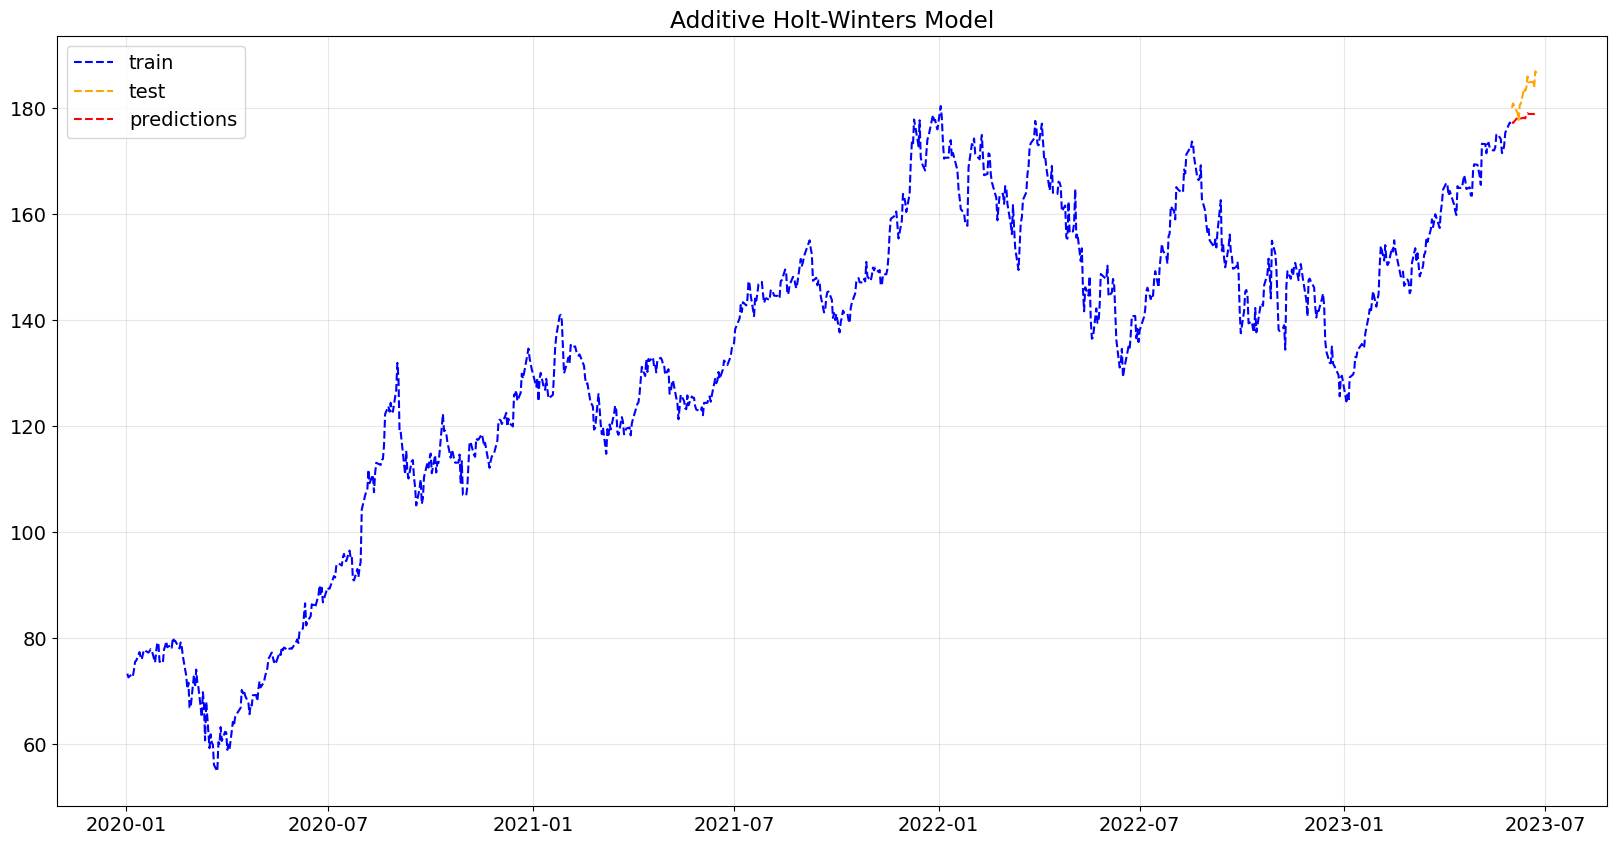

In [28]:
plt.plot(train.index, train, 'b--', label="train")
plt.plot(test.index, test, color='orange', linestyle="--", label="test")
plt.plot(test.index, triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Additive Holt-Winters Model")
plt.grid(alpha=0.3);

In [29]:
triple2 = ExponentialSmoothing(train,
                              trend="mul",
                              seasonal="mul",
                              seasonal_periods=7).fit(optimized=True)
triple2_preds = triple2.forecast(len(test))
print("Predictions: ", triple2_preds)
print(f'MSE of Multiplicative Holt Winters Model = {mean_squared_error(test,triple2_preds)}')

Predictions:  859    177.363310
860    177.228695
861    178.073689
862    178.460015
863    178.131740
864    178.188880
865    178.053309
866    178.179474
867    178.044240
868    178.893122
869    179.281225
870    178.951439
871    179.008843
872    178.872648
873    178.999393
874    178.863537
dtype: float64
MSE of Multiplicative Holt Winters Model = 24.438131030099772


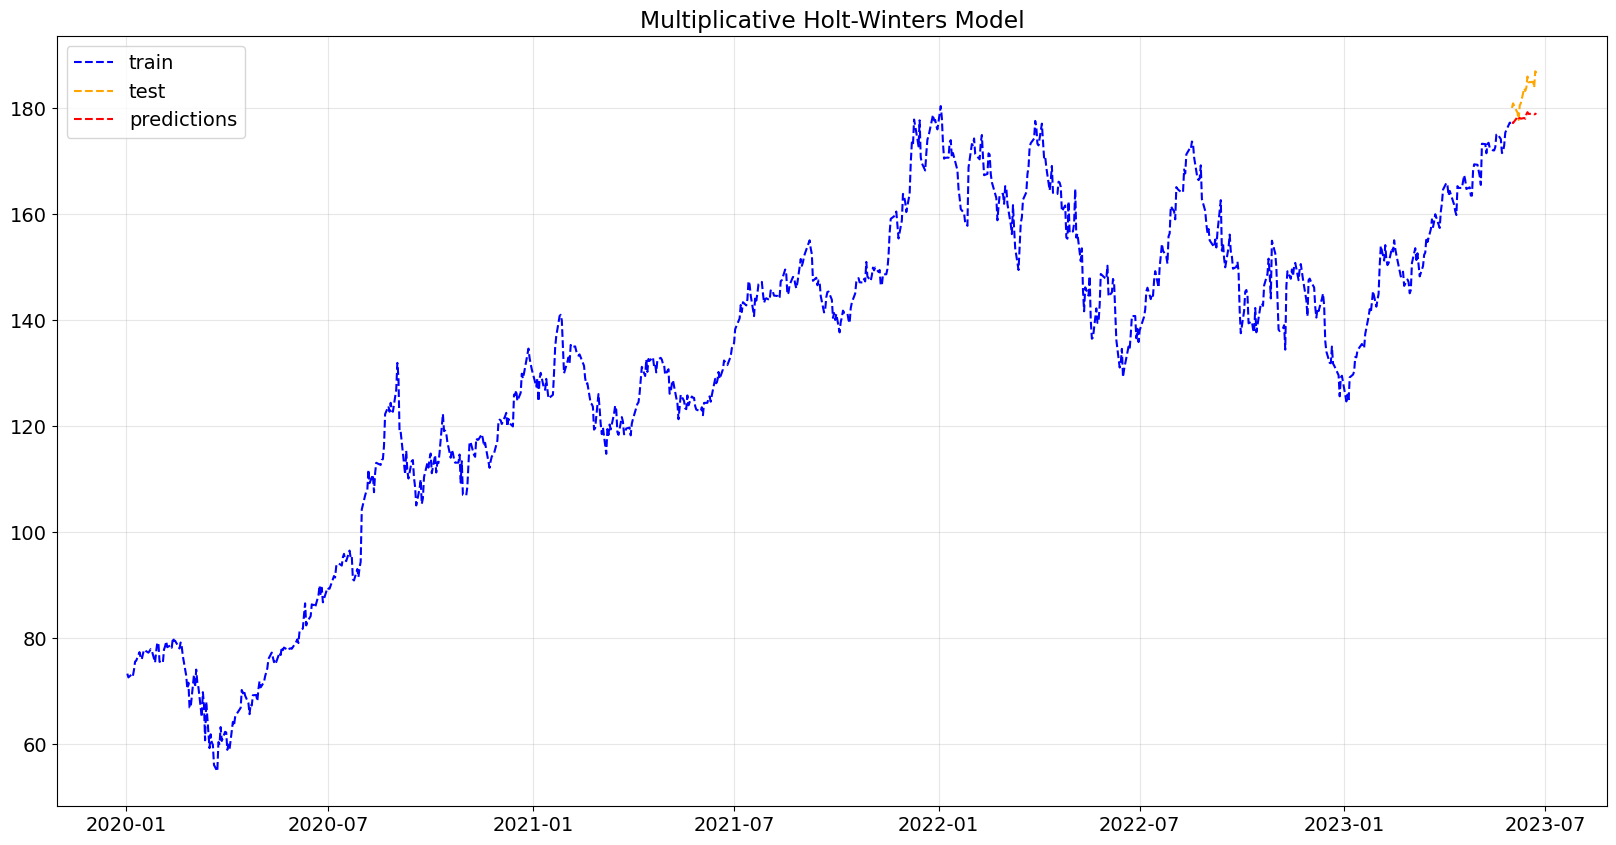

In [30]:
plt.plot(train.index, train, 'b--', label="train")
plt.plot(test.index, test, color='orange', linestyle="--", label="test")
plt.plot(test.index, triple2_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Multiplicative Holt-Winters Model")
plt.grid(alpha=0.3);

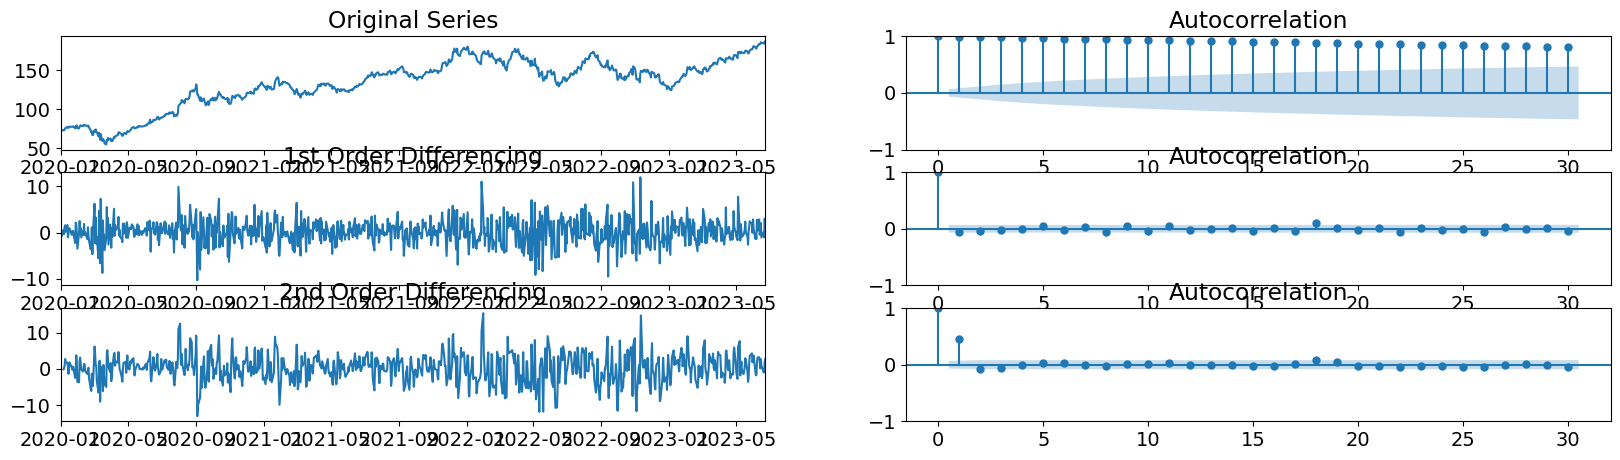

<Figure size 2000x1000 with 0 Axes>

In [15]:
import datetime as dt
import matplotlib.dates as mdates

# Original Series
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(20, 5))
axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
axes[0, 0].set_xlim(dt.datetime(2020,1,1), dt.datetime(2023,6,23))
plot_acf(train, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
axes[1, 0].set_xlim(dt.datetime(2020,1,1), dt.datetime(2023,6,23))
plot_acf(train.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Close'].diff(2)); axes[2, 0].set_title('2nd Order Differencing')
axes[2, 0].set_xlim(dt.datetime(2020,1,1), dt.datetime(2023,6,23))
plot_acf(train.diff(2).dropna(), ax=axes[2, 1])

plt.show()
plt.tight_layout()

In [16]:
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

arima_model = auto_arima(train, start_p = 1, start_q = 1,test='adf',
                          max_p = 3, max_q = 3, m =1,
                          start_P = 0, seasonal = False,
                          d = None, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4141.515, Time=2.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4141.736, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4140.991, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4140.787, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4141.463, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4141.748, Time=0.44 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4143.427, Time=0.72 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4140.748, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4141.698, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4141.856, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4140.923, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4143.610, Time=0.35 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.954 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  859
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2068.374
Date:                Sun, 25 Jun 2023   AIC                           4140.748
Time:                        07:33:14   BIC                           4150.257
Sample:                             0   HQIC                          4144.389
                                - 859                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0582      0.029     -1.985      0.047      -0.116      -0.001
sigma2         7.2682      0.271     26.778      0.000       6.736       7.800
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                78.70
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

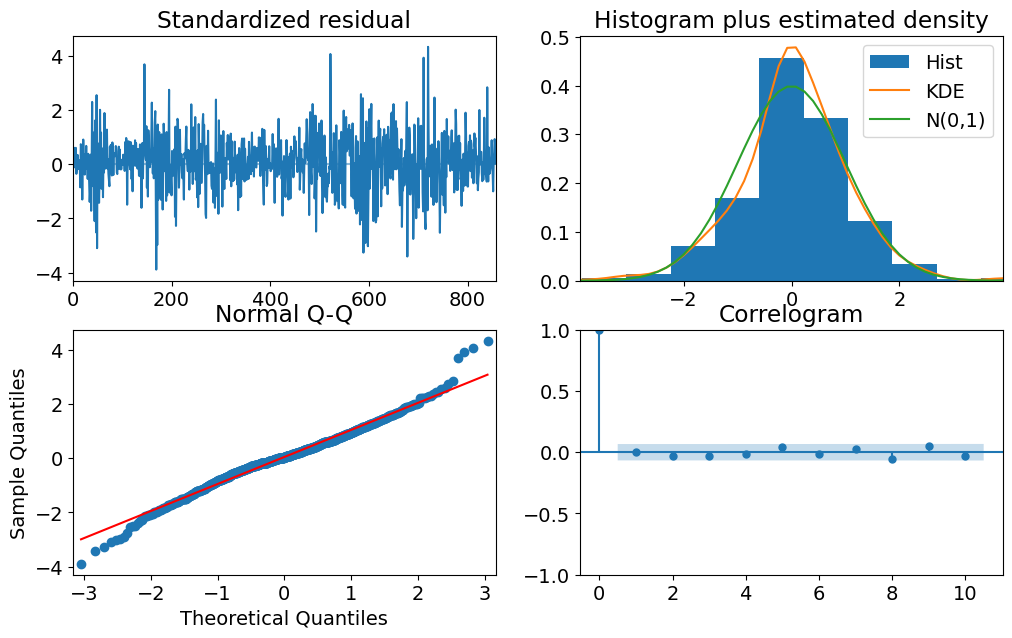

In [17]:
arima_model.plot_diagnostics(figsize=(12,7))
plt.show()

In [19]:
arimapreds = arima_model.predict(len(test))
arimapreds

array([177.2460877, 177.2460877, 177.2460877, 177.2460877, 177.2460877,
       177.2460877, 177.2460877, 177.2460877, 177.2460877, 177.2460877,
       177.2460877, 177.2460877, 177.2460877, 177.2460877, 177.2460877,
       177.2460877])

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'MSE of Addictive Holt Winters Model = {mean_squared_error(test,arimapreds)}')

MSE of Addictive Holt Winters Model = 37.875331626227585


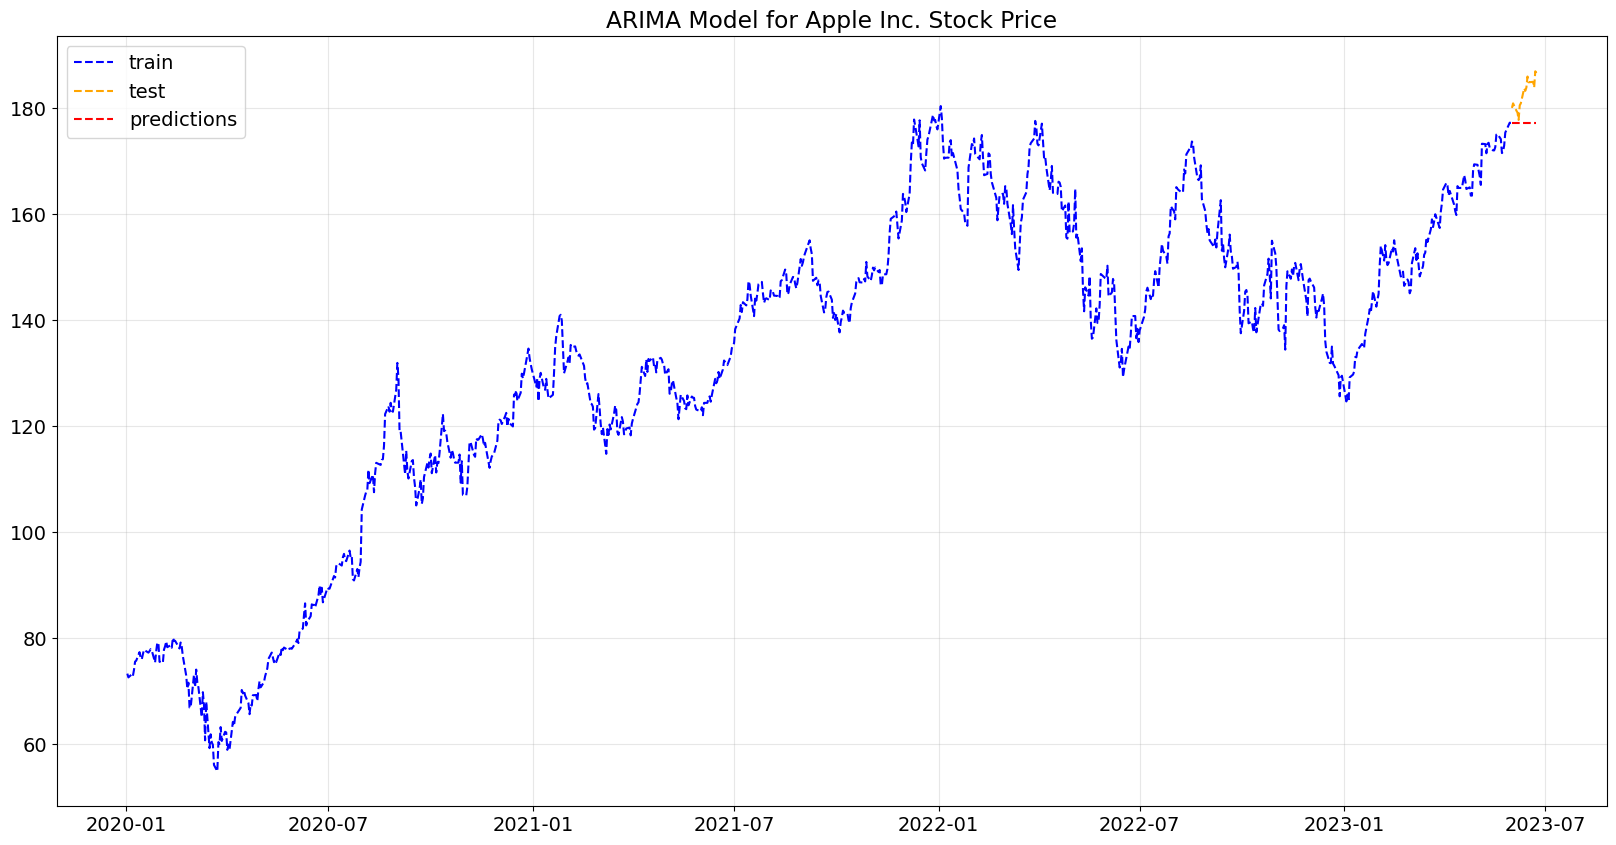

In [21]:
plt.plot(train.index, train, 'b--', label="train")
plt.plot(test.index, test, color='orange', linestyle="--", label="test")
plt.plot(test.index, arimapreds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("ARIMA Model for Apple Inc. Stock Price")
plt.grid(alpha=0.3);

In [22]:
stepwise_fit = auto_arima(train, start_p = 1, start_q = 1,test='adf',
                          max_p = 3, max_q = 3, m = 7, # m = 7 (daily data), 12 (monthly data), 24 (hourly data), 1 (annual data)(please set seasonal = False)
                          seasonal = True,
                          start_P = 0, D = 1, start_Q = 0,
                          d = None, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=4608.198, Time=0.73 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=5625.952, Time=0.17 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=4406.973, Time=1.53 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=5019.679, Time=1.13 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=5637.345, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=4610.242, Time=0.29 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=4324.284, Time=2.17 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=3.80 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=4.85 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=5629.832, Time=2.04 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=4326.097, Time=3.35 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=4326.092, Time=3.29 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=5021.803, Time=2.67 sec
 ARIMA(2,0,1)(2,1,0)[7] intercept   : AIC=4326.902, Time=12.73 sec
 ARIMA(1,0,0)(2,1,0)[7]             : AIC=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  859
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 7)   Log Likelihood               -2157.833
Date:                           Sun, 25 Jun 2023   AIC                           4323.666
Time:                                   07:38:11   BIC                           4342.657
Sample:                                        0   HQIC                          4330.940
                                           - 859                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9281      0.012     76.207      0.000       0.904       0.952
ar.S.L7       -0.6324      0.029    -22.045      0.000      -0.689      -0.576
ar.S.L14      -0.3129      0.029    -10.813      0.000      -0.370      -0.256
sigma2         9.2276      0.357     25.876      0.000       8.529       9.927
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                54.68
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

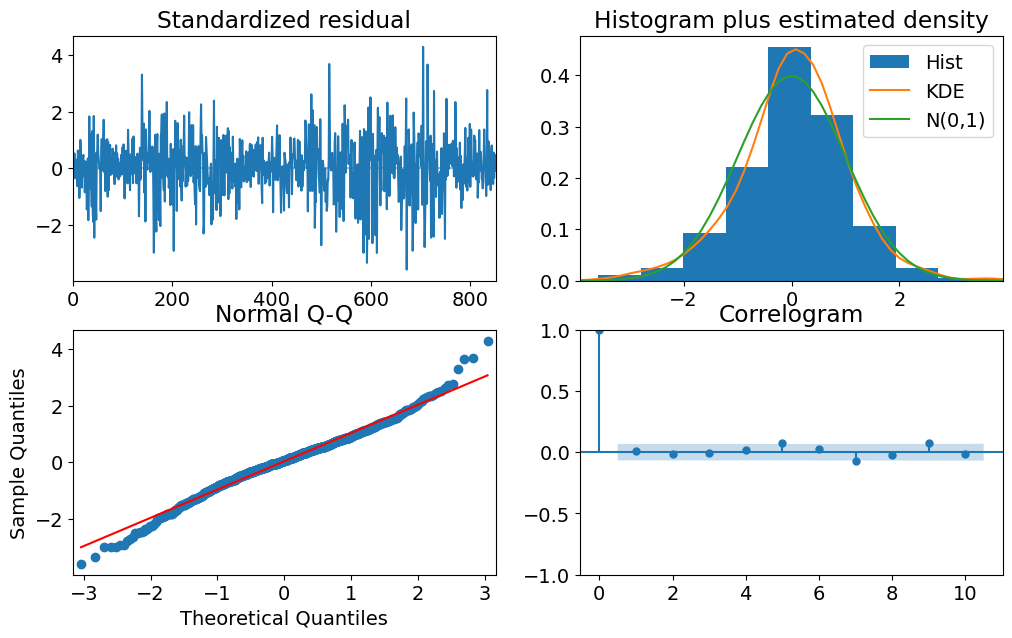

In [23]:
stepwise_fit.plot_diagnostics(figsize=(12,7))
plt.show()

In [24]:
sarimapreds = stepwise_fit.predict(len(test))
sarimapreds

array([176.30650204, 174.39523573, 173.54137808, 176.13691375,
       176.97031777, 177.64863515, 178.01823225, 177.23240921,
       175.21436627, 174.66840109, 175.83671588, 176.97442366,
       178.42771488, 178.45953594, 177.45515224, 175.17109746])

In [25]:
print(f'MSE of Addictive Holt Winters Model = {mean_squared_error(test,sarimapreds)}')

MSE of Addictive Holt Winters Model = 48.72227040014231
